In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [14]:
data_path = './clean_data'

df = pd.DataFrame()
for i in range(2022, 2025):
    temp = pd.read_csv(f'{data_path}/clean{i}.csv')
    temp['Year'] = [i] * len(temp)
    df = pd.concat([df, temp], ignore_index=True)
    

In [15]:
df

,Code,Toan,NguVan,NgoaiNgu,VatLi,HoaHoc,SinhHoc,KHTN,DiaLi,LichSu,GDCD,KHXH,Fail,Year
0,64000001,7.2,7.00,4.8,NaN,NaN,NaN,NaN,8.50,9.00,8.50,8.67,NaN,2022
1,64000002,5.0,7.00,3.0,NaN,NaN,NaN,NaN,6.25,5.25,7.00,6.17,NaN,2022
2,64000003,7.2,6.75,5.4,NaN,NaN,NaN,NaN,6.00,7.50,8.75,7.42,NaN,2022
3,64000004,8.2,7.25,3.0,NaN,NaN,NaN,NaN,6.75,6.25,8.25,7.08,NaN,2022
4,64000005,8.0,6.50,5.0,6.50,7.25,6.25,6.67,NaN,NaN,NaN,NaN,NaN,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20742,64007282,4.2,6.00,3.0,NaN,NaN,NaN,NaN,6.25,5.25,7.50,6.33,NaN,2024
20743,64007283,5.2,6.00,3.6,NaN,NaN,NaN,NaN,5.75,6.25,7.75,6.58,NaN,2024
20744,64007284,7.2,8.00,7.0,6.25,7.00,8.00,7.08,NaN,NaN,NaN,NaN,NaN,2024
20745,64007285,5.2,5.25,4.4,NaN,NaN,NaN,NaN,6.50,4.75,8.75,6.67,NaN,2024


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20747 entries, 0 to 20746
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Code      20747 non-null  int64  
 1   Toan      20174 non-null  float64
 2   NguVan    20507 non-null  float64
 3   NgoaiNgu  19155 non-null  float64
 4   VatLi     5857 non-null   float64
 5   HoaHoc    5917 non-null   float64
 6   SinhHoc   5829 non-null   float64
 7   KHTN      5753 non-null   float64
 8   DiaLi     14691 non-null  float64
 9   LichSu    14748 non-null  float64
 10  GDCD      13383 non-null  float64
 11  KHXH      13379 non-null  float64
 12  Fail      12 non-null     object 
 13  Year      20747 non-null  int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 2.2+ MB


In [17]:
df.describe()

,Code,Toan,NguVan,NgoaiNgu,VatLi,HoaHoc,SinhHoc,KHTN,DiaLi,LichSu,GDCD,KHXH,Year
count,2.074700e+04,20174.000000,20507.000000,19155.000000,5857.000000,5917.000000,5829.000000,5753.000000,14691.000000,14748.000000,13383.000000,13379.000000,20747.000000
mean,6.400347e+07,5.807148,6.546746,4.342981,6.138467,6.603727,6.004589,6.245342,6.622490,6.132594,8.109224,6.979513,2023.034318
std,2.011517e+03,1.555560,1.122019,1.559169,1.492429,1.484340,1.401665,1.115196,1.240648,1.525252,1.034753,1.052893,0.815164
min,6.400000e+07,0.800000,1.000000,0.400000,0.500000,1.750000,1.500000,2.250000,0.000000,0.750000,0.000000,1.500000,2022.000000
25%,6.400173e+07,4.600000,5.750000,3.200000,5.000000,5.750000,5.000000,5.500000,5.750000,5.000000,7.500000,6.250000,2022.000000
50%,6.400347e+07,6.000000,6.500000,4.000000,6.250000,6.750000,6.000000,6.330000,6.750000,6.250000,8.250000,7.000000,2023.000000
75%,6.400520e+07,7.000000,7.250000,5.200000,7.250000,7.750000,7.000000,7.080000,7.500000,7.250000,9.000000,7.750000,2024.000000
max,6.400729e+07,9.800000,9.500000,9.800000,9.750000,10.000000,9.750000,9.080000,10.000000,10.000000,10.000000,9.830000,2024.000000


## Total definitely failed student

In [18]:
defintely_failed = df[df['Fail'] == True]
print(f'The number of definitely failed students is {len(defintely_failed)}')

The number of definitely failed students is 12


## Percent of student who prefers science than social

Text(0.5, 1.0, 'Percentage of students in KHTN and KHXH')

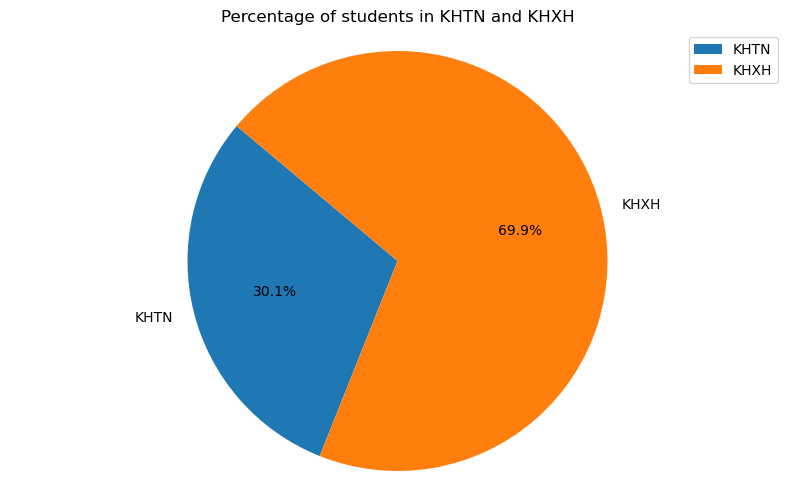

In [22]:
count_KHTN = df['KHTN'].notna().sum()
count_KHXH = df['KHXH'].notna().sum()
labels = ['KHTN', 'KHXH']
sizes = [count_KHTN, count_KHXH]
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.legend()
plt.title('Percentage of students in KHTN and KHXH')


## Plot the distribution of each subject from 2022 to 2024

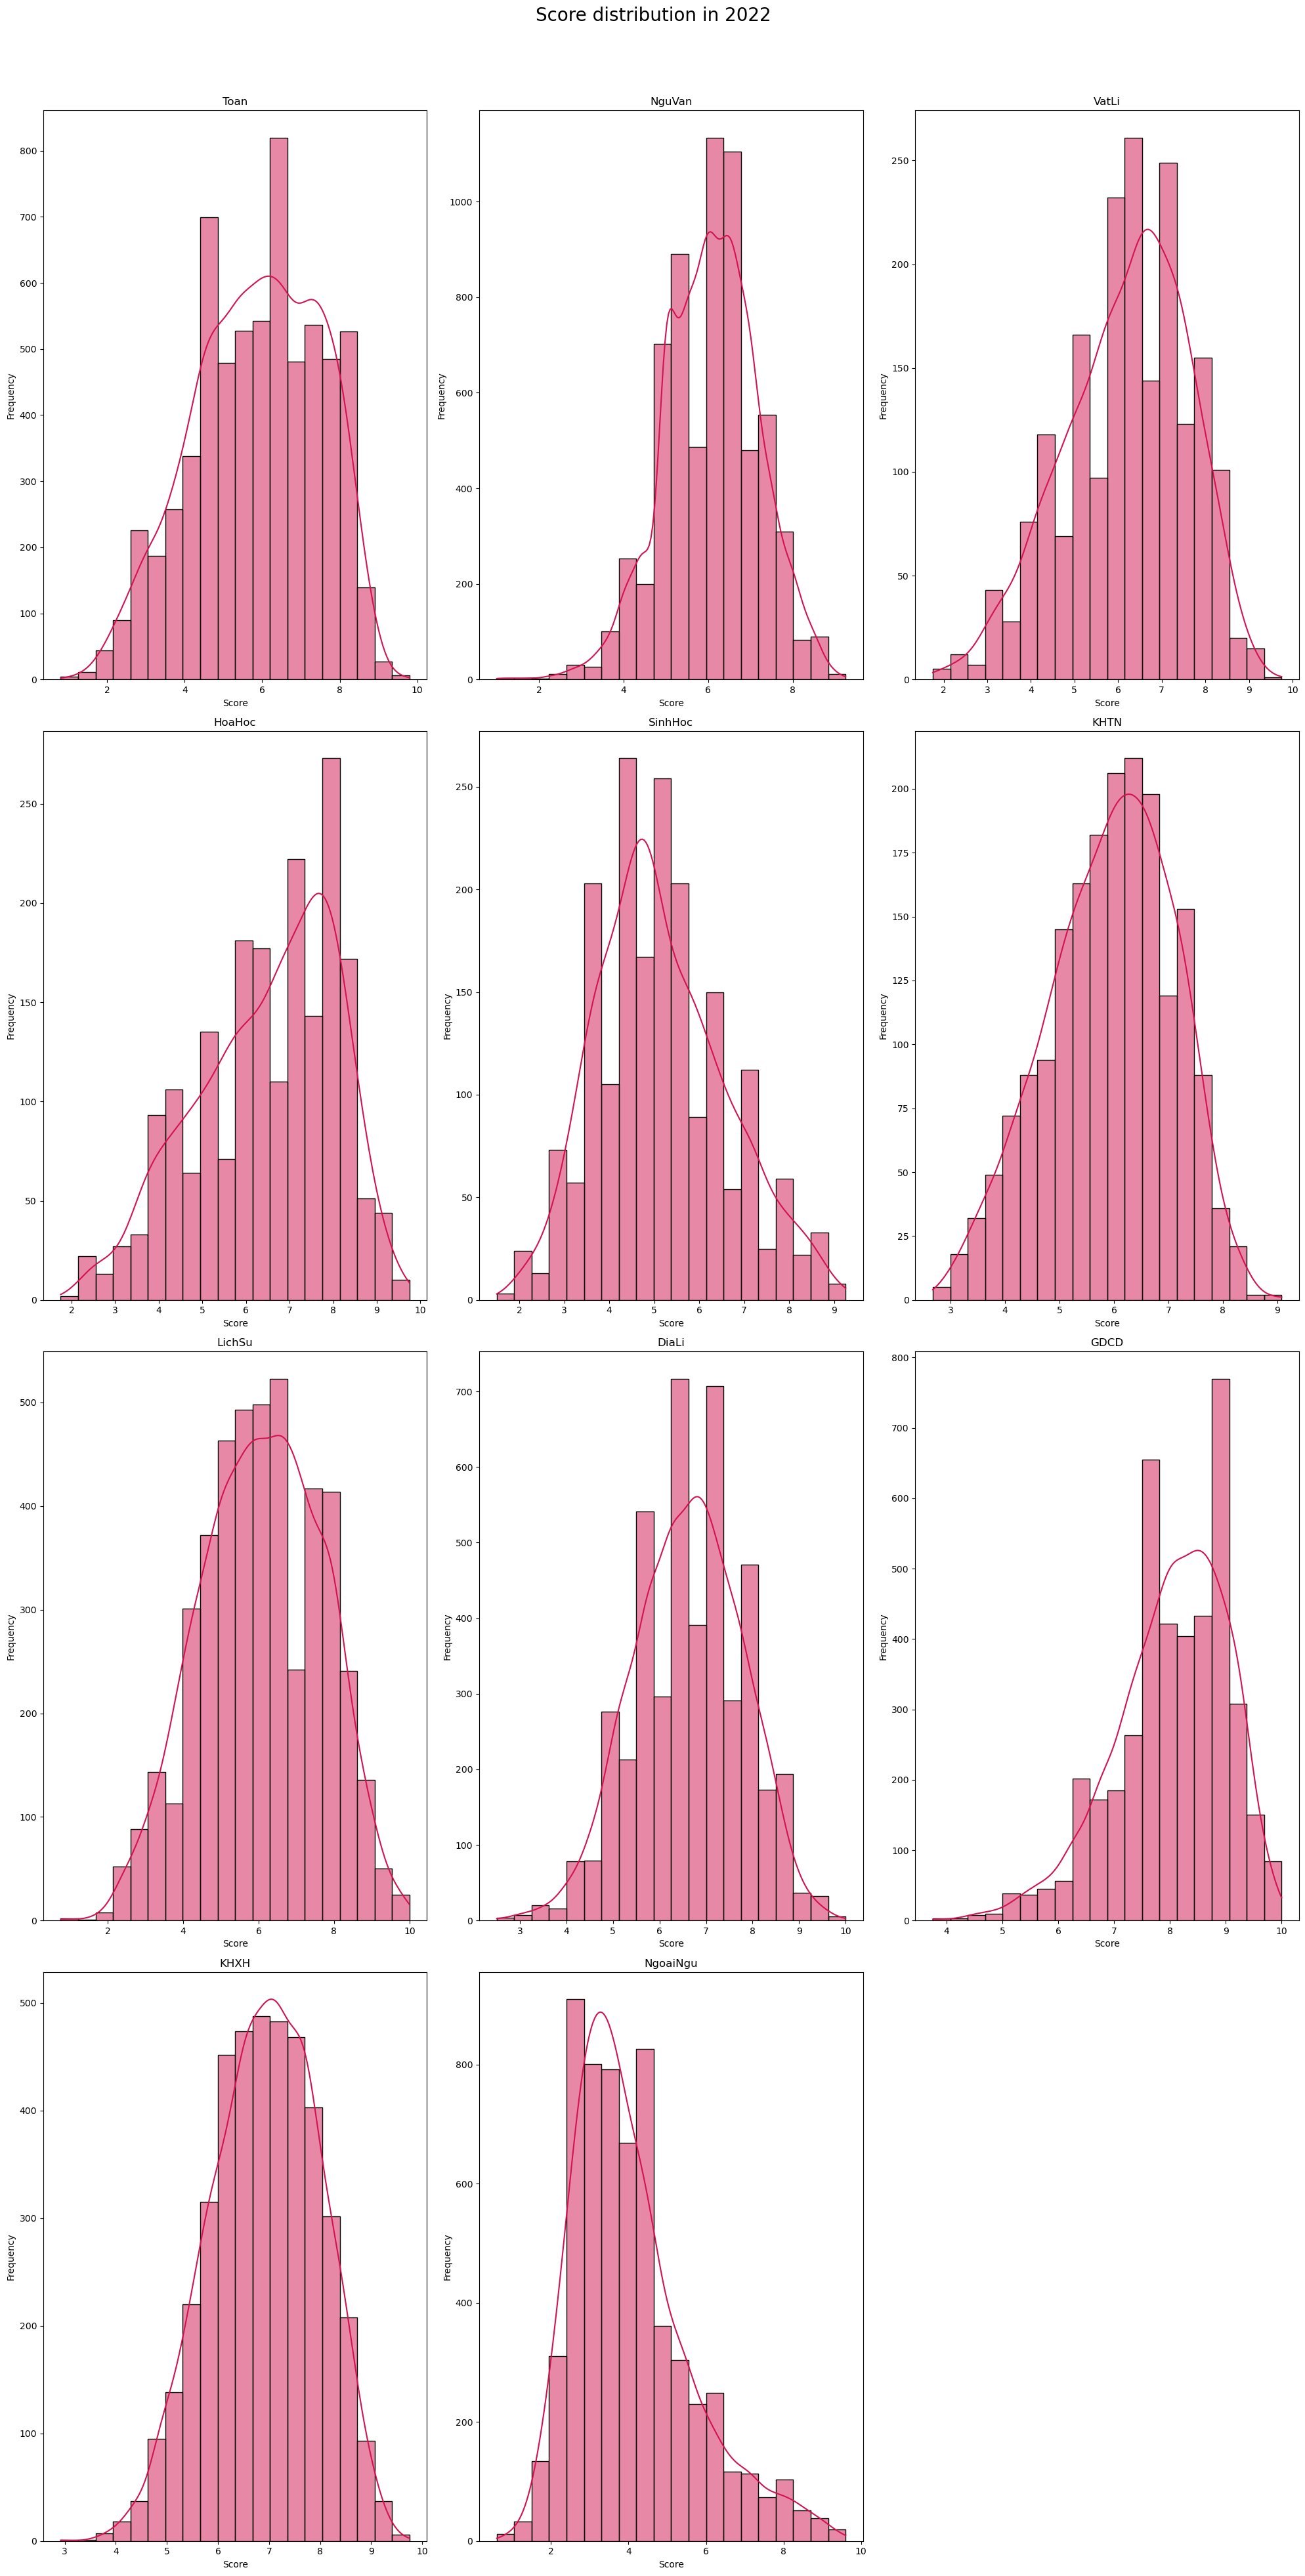

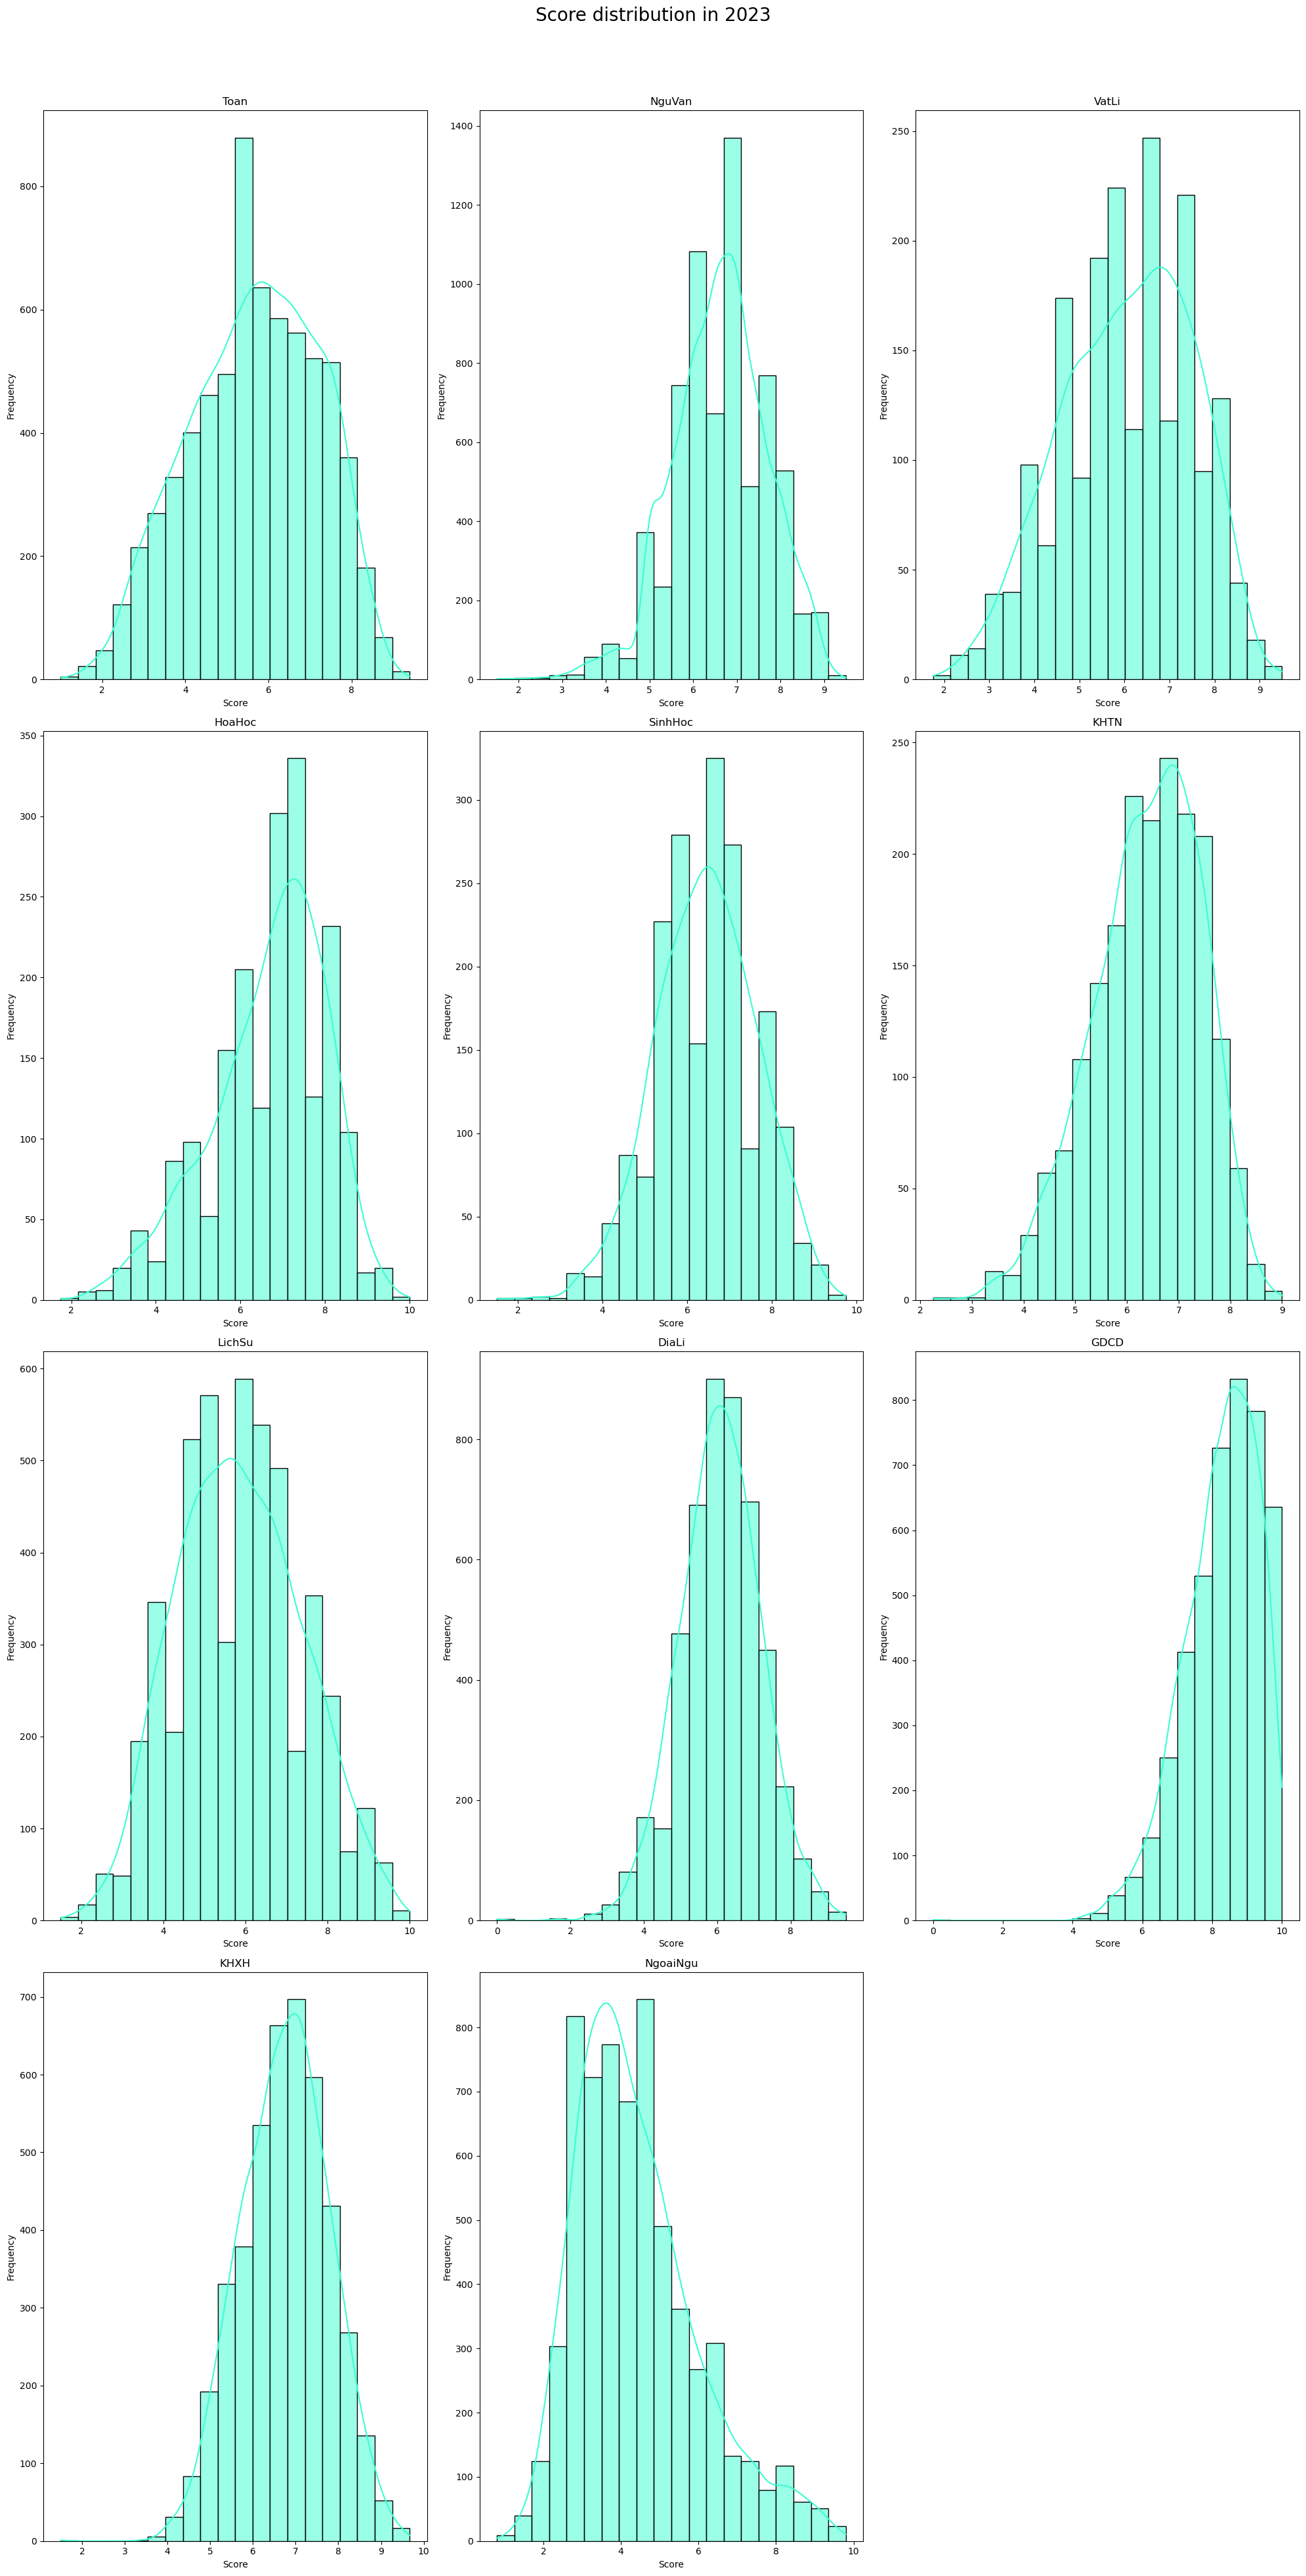

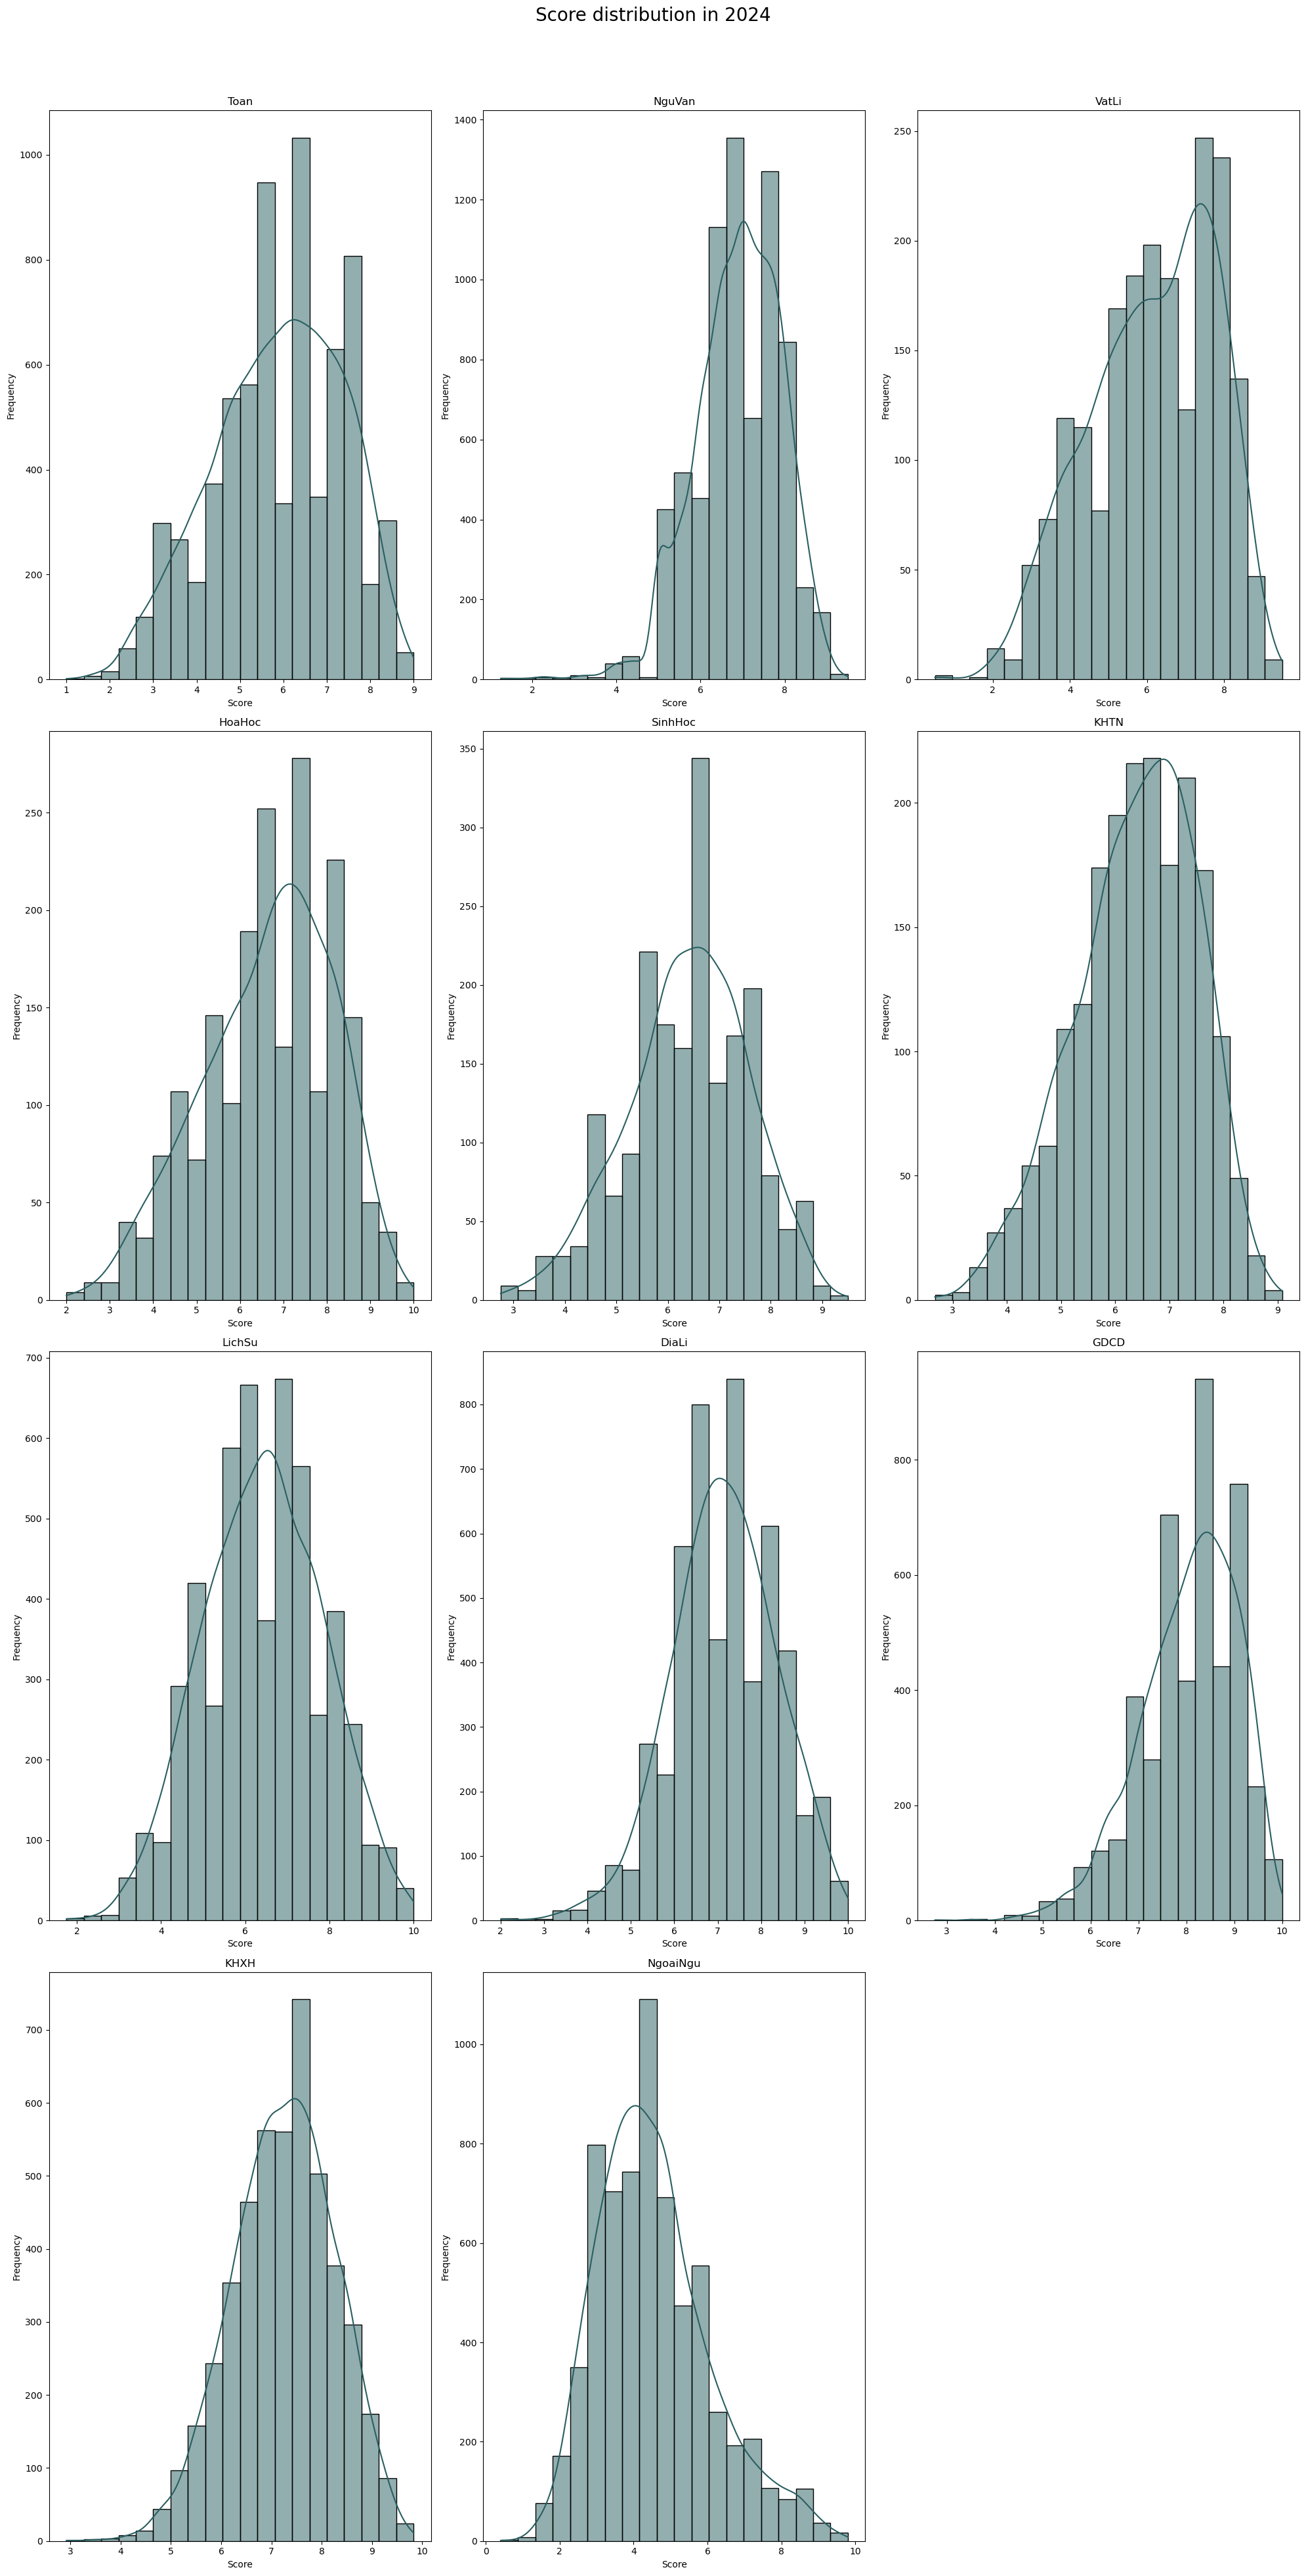

In [24]:
years = [2022, 2023, 2024]
subjects = ['Toan', 'NguVan', 'VatLi', 'HoaHoc', 'SinhHoc', 'KHTN', 'LichSu', 'DiaLi', 'GDCD', 'KHXH', 'NgoaiNgu']

for year in years:
    df_year = df[df['Year'] == year]
    fig, axes = plt.subplots(nrows = -(-len(subjects) // 3), ncols = 3 , figsize=(20, 40))
    fig.suptitle(f'Score distribution in {year}', fontsize=20)
    axes = axes.flatten()
    color = tuple(np.random.rand(3))
    for i, subject in enumerate(subjects):
        sns.histplot(df_year[subject].dropna(), kde=True, ax=axes[i], bins = 20, color = color)
        axes[i].set_title(f'{subject}')
        axes[i].set_xlabel('Score')
        axes[i].set_ylabel('Frequency')
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
        
        

## Highest score for each subject from 2022 to 2024

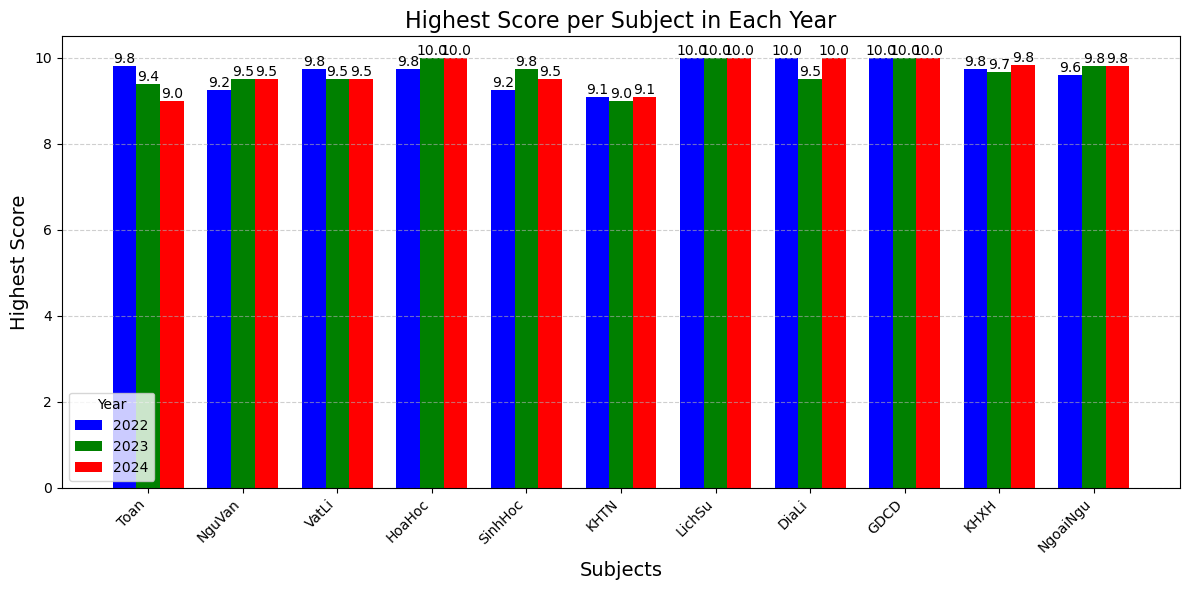

In [ ]:
years = [2022, 2023, 2024]
subjects = ['Toan', 'NguVan', 'VatLi', 'HoaHoc', 'SinhHoc', 'KHTN', 'LichSu', 'DiaLi', 'GDCD', 'KHXH', 'NgoaiNgu']

# Collect highest scores for each subject per year
highest_scores = {year: [] for year in years}

for year in years:
    df_year = df[df['Year'] == year]
    for subject in subjects:
        highest_scores[year].append(df_year[subject].max())  # Get max score per subject

x = np.arange(len(subjects))  
width = 0.25  

fig, ax = plt.subplots(figsize=(12, 6))

colors = ['b', 'g', 'r'] 
for i, year in enumerate(years):
    bars = ax.bar(x + i * width, highest_scores[year], width, label=str(year), color=colors[i])
    
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom', fontsize=10)

ax.set_title('Highest Score per Subject in Each Year', fontsize=16)
ax.set_xlabel('Subjects', fontsize=14)
ax.set_ylabel('Highest Score', fontsize=14)
ax.set_xticks(x + width)  
ax.set_xticklabels(subjects, rotation=45, ha='right') 
ax.legend(title='Year')
ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()



In [32]:
df['A00'] = df['Toan'] + df['VatLi'] + df['HoaHoc']
df['B00'] = df['Toan'] + df['HoaHoc'] + df['SinhHoc'] 
df['C00'] = df['DiaLi'] + df['NguVan'] + df['LichSu']
df['D00'] = df['Toan'] + df['NguVan'] + df['NgoaiNgu']
df['A01'] = df['Toan'] + df['VatLi'] + df['NgoaiNgu']

In [33]:
df

,Code,Toan,NguVan,NgoaiNgu,VatLi,HoaHoc,SinhHoc,KHTN,DiaLi,LichSu,GDCD,KHXH,Fail,Year,A00,B00,C00,D00,A01
0,64000001,7.2,7.00,4.8,NaN,NaN,NaN,NaN,8.50,9.00,8.50,8.67,NaN,2022,NaN,NaN,24.50,19.00,NaN
1,64000002,5.0,7.00,3.0,NaN,NaN,NaN,NaN,6.25,5.25,7.00,6.17,NaN,2022,NaN,NaN,18.50,15.00,NaN
2,64000003,7.2,6.75,5.4,NaN,NaN,NaN,NaN,6.00,7.50,8.75,7.42,NaN,2022,NaN,NaN,20.25,19.35,NaN
3,64000004,8.2,7.25,3.0,NaN,NaN,NaN,NaN,6.75,6.25,8.25,7.08,NaN,2022,NaN,NaN,20.25,18.45,NaN
4,64000005,8.0,6.50,5.0,6.50,7.25,6.25,6.67,NaN,NaN,NaN,NaN,NaN,2022,21.75,21.5,NaN,19.50,19.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20742,64007282,4.2,6.00,3.0,NaN,NaN,NaN,NaN,6.25,5.25,7.50,6.33,NaN,2024,NaN,NaN,17.50,13.20,NaN
20743,64007283,5.2,6.00,3.6,NaN,NaN,NaN,NaN,5.75,6.25,7.75,6.58,NaN,2024,NaN,NaN,18.00,14.80,NaN
20744,64007284,7.2,8.00,7.0,6.25,7.00,8.00,7.08,NaN,NaN,NaN,NaN,NaN,2024,20.45,22.2,NaN,22.20,20.45
20745,64007285,5.2,5.25,4.4,NaN,NaN,NaN,NaN,6.50,4.75,8.75,6.67,NaN,2024,NaN,NaN,16.50,14.85,NaN


## Plot the distribution of each popular block

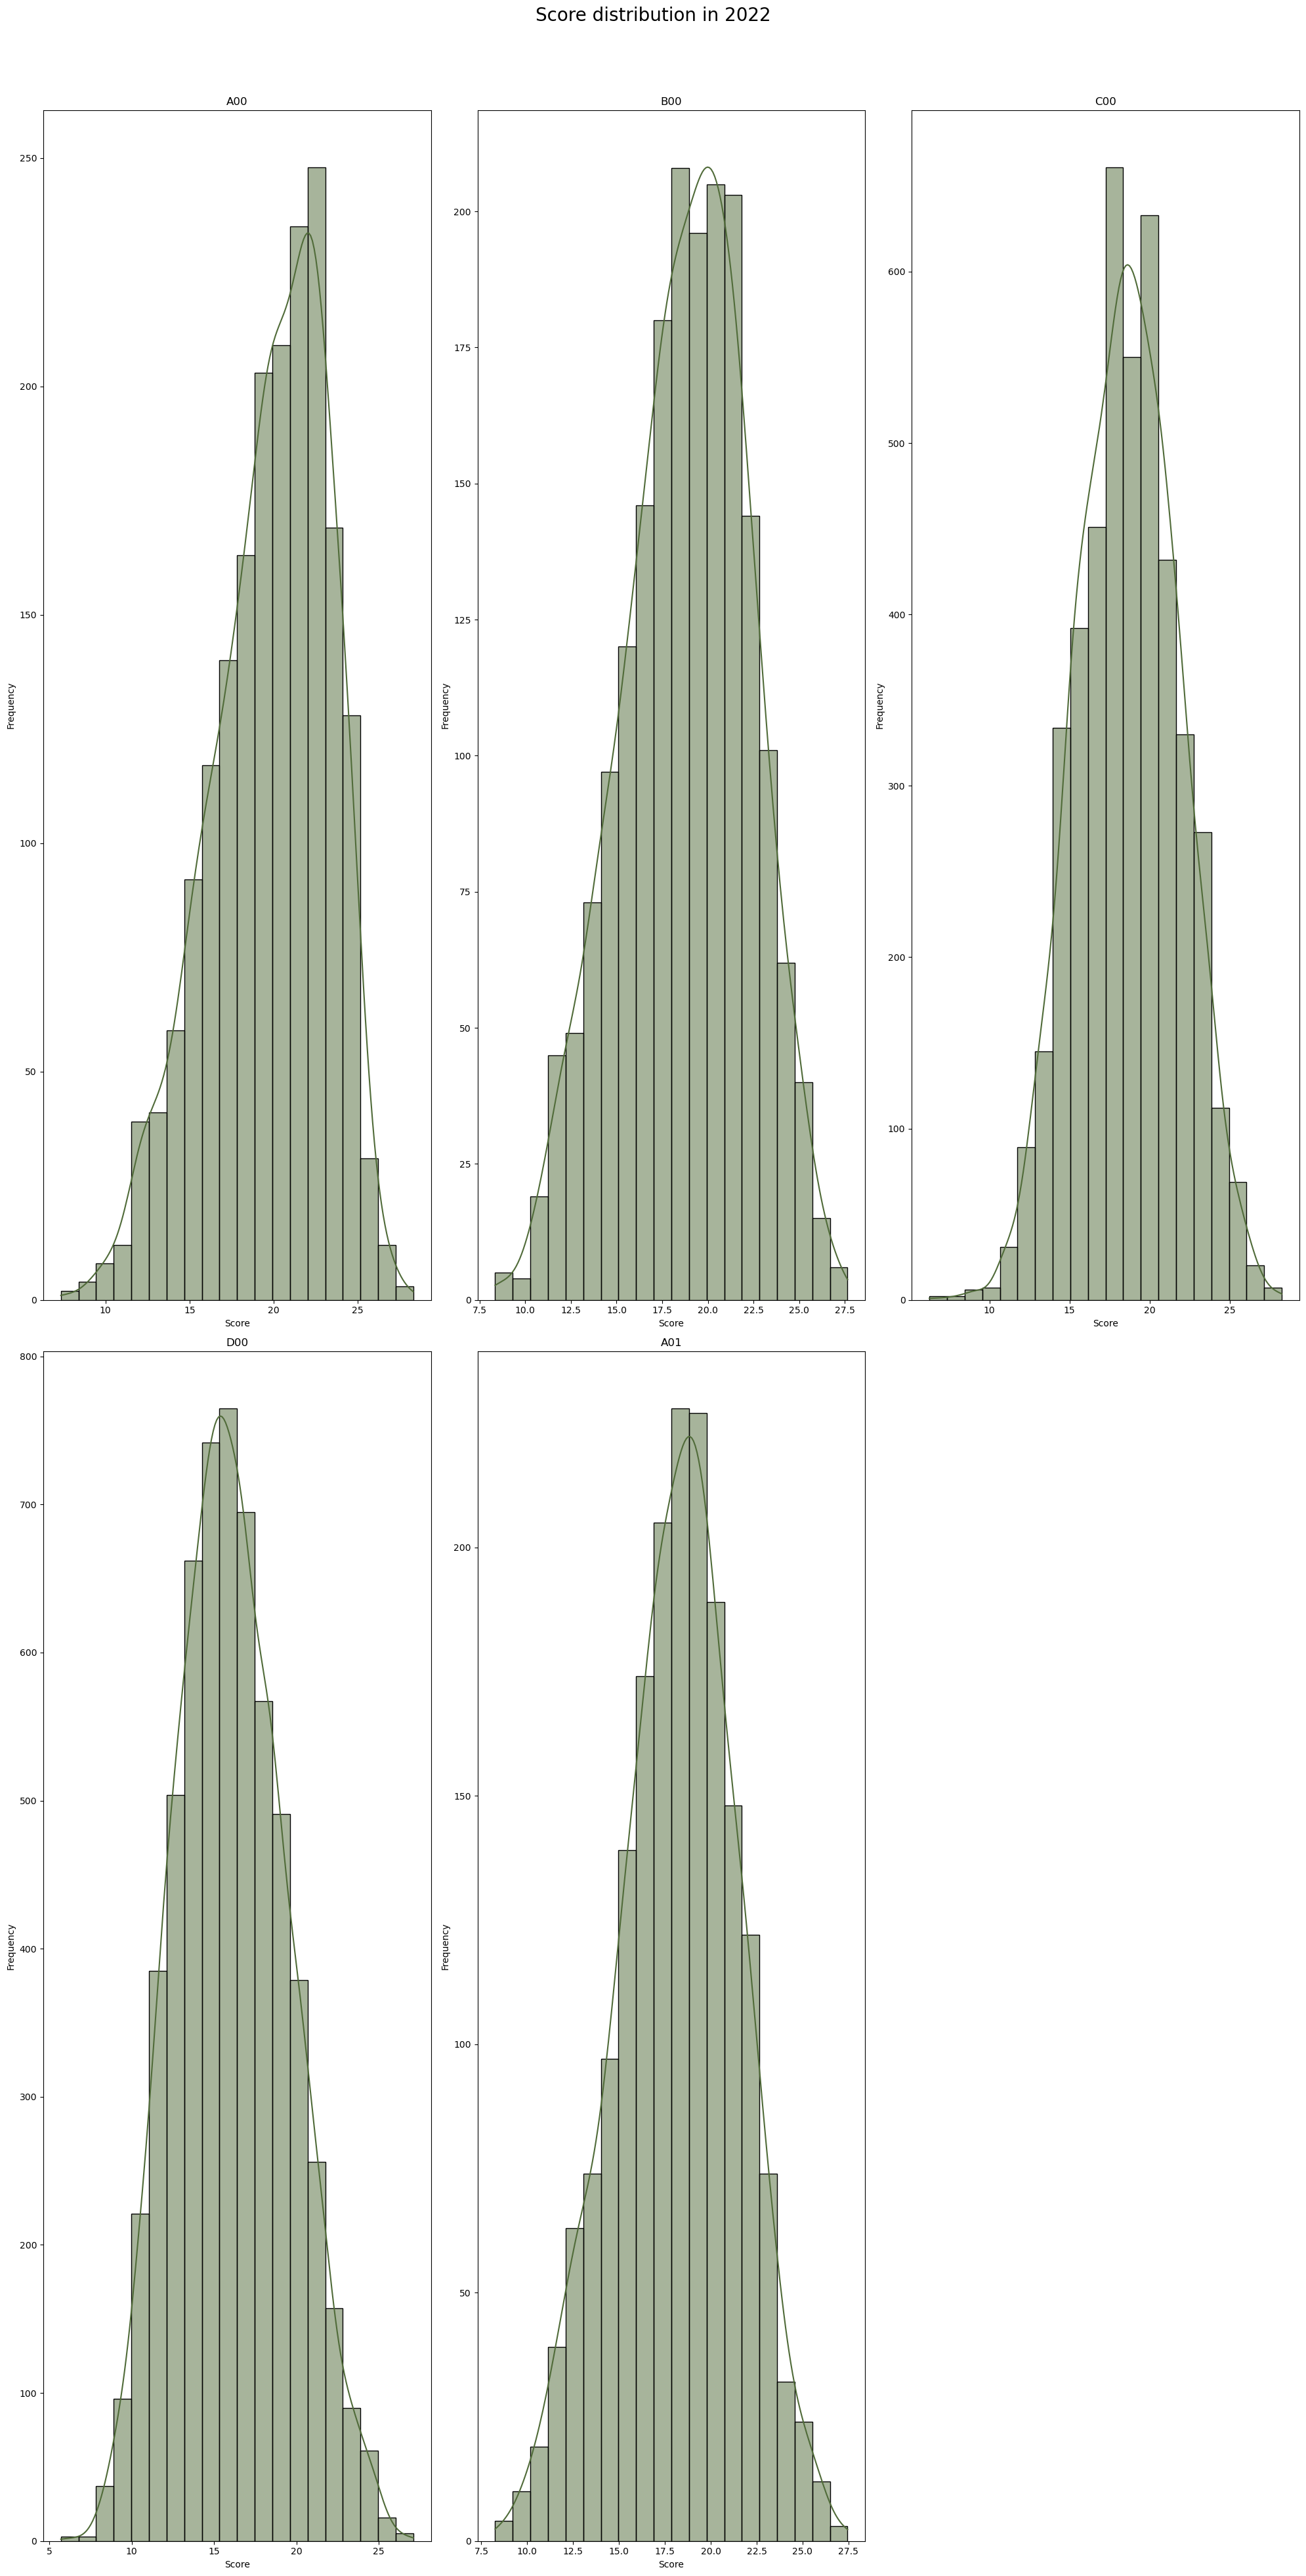

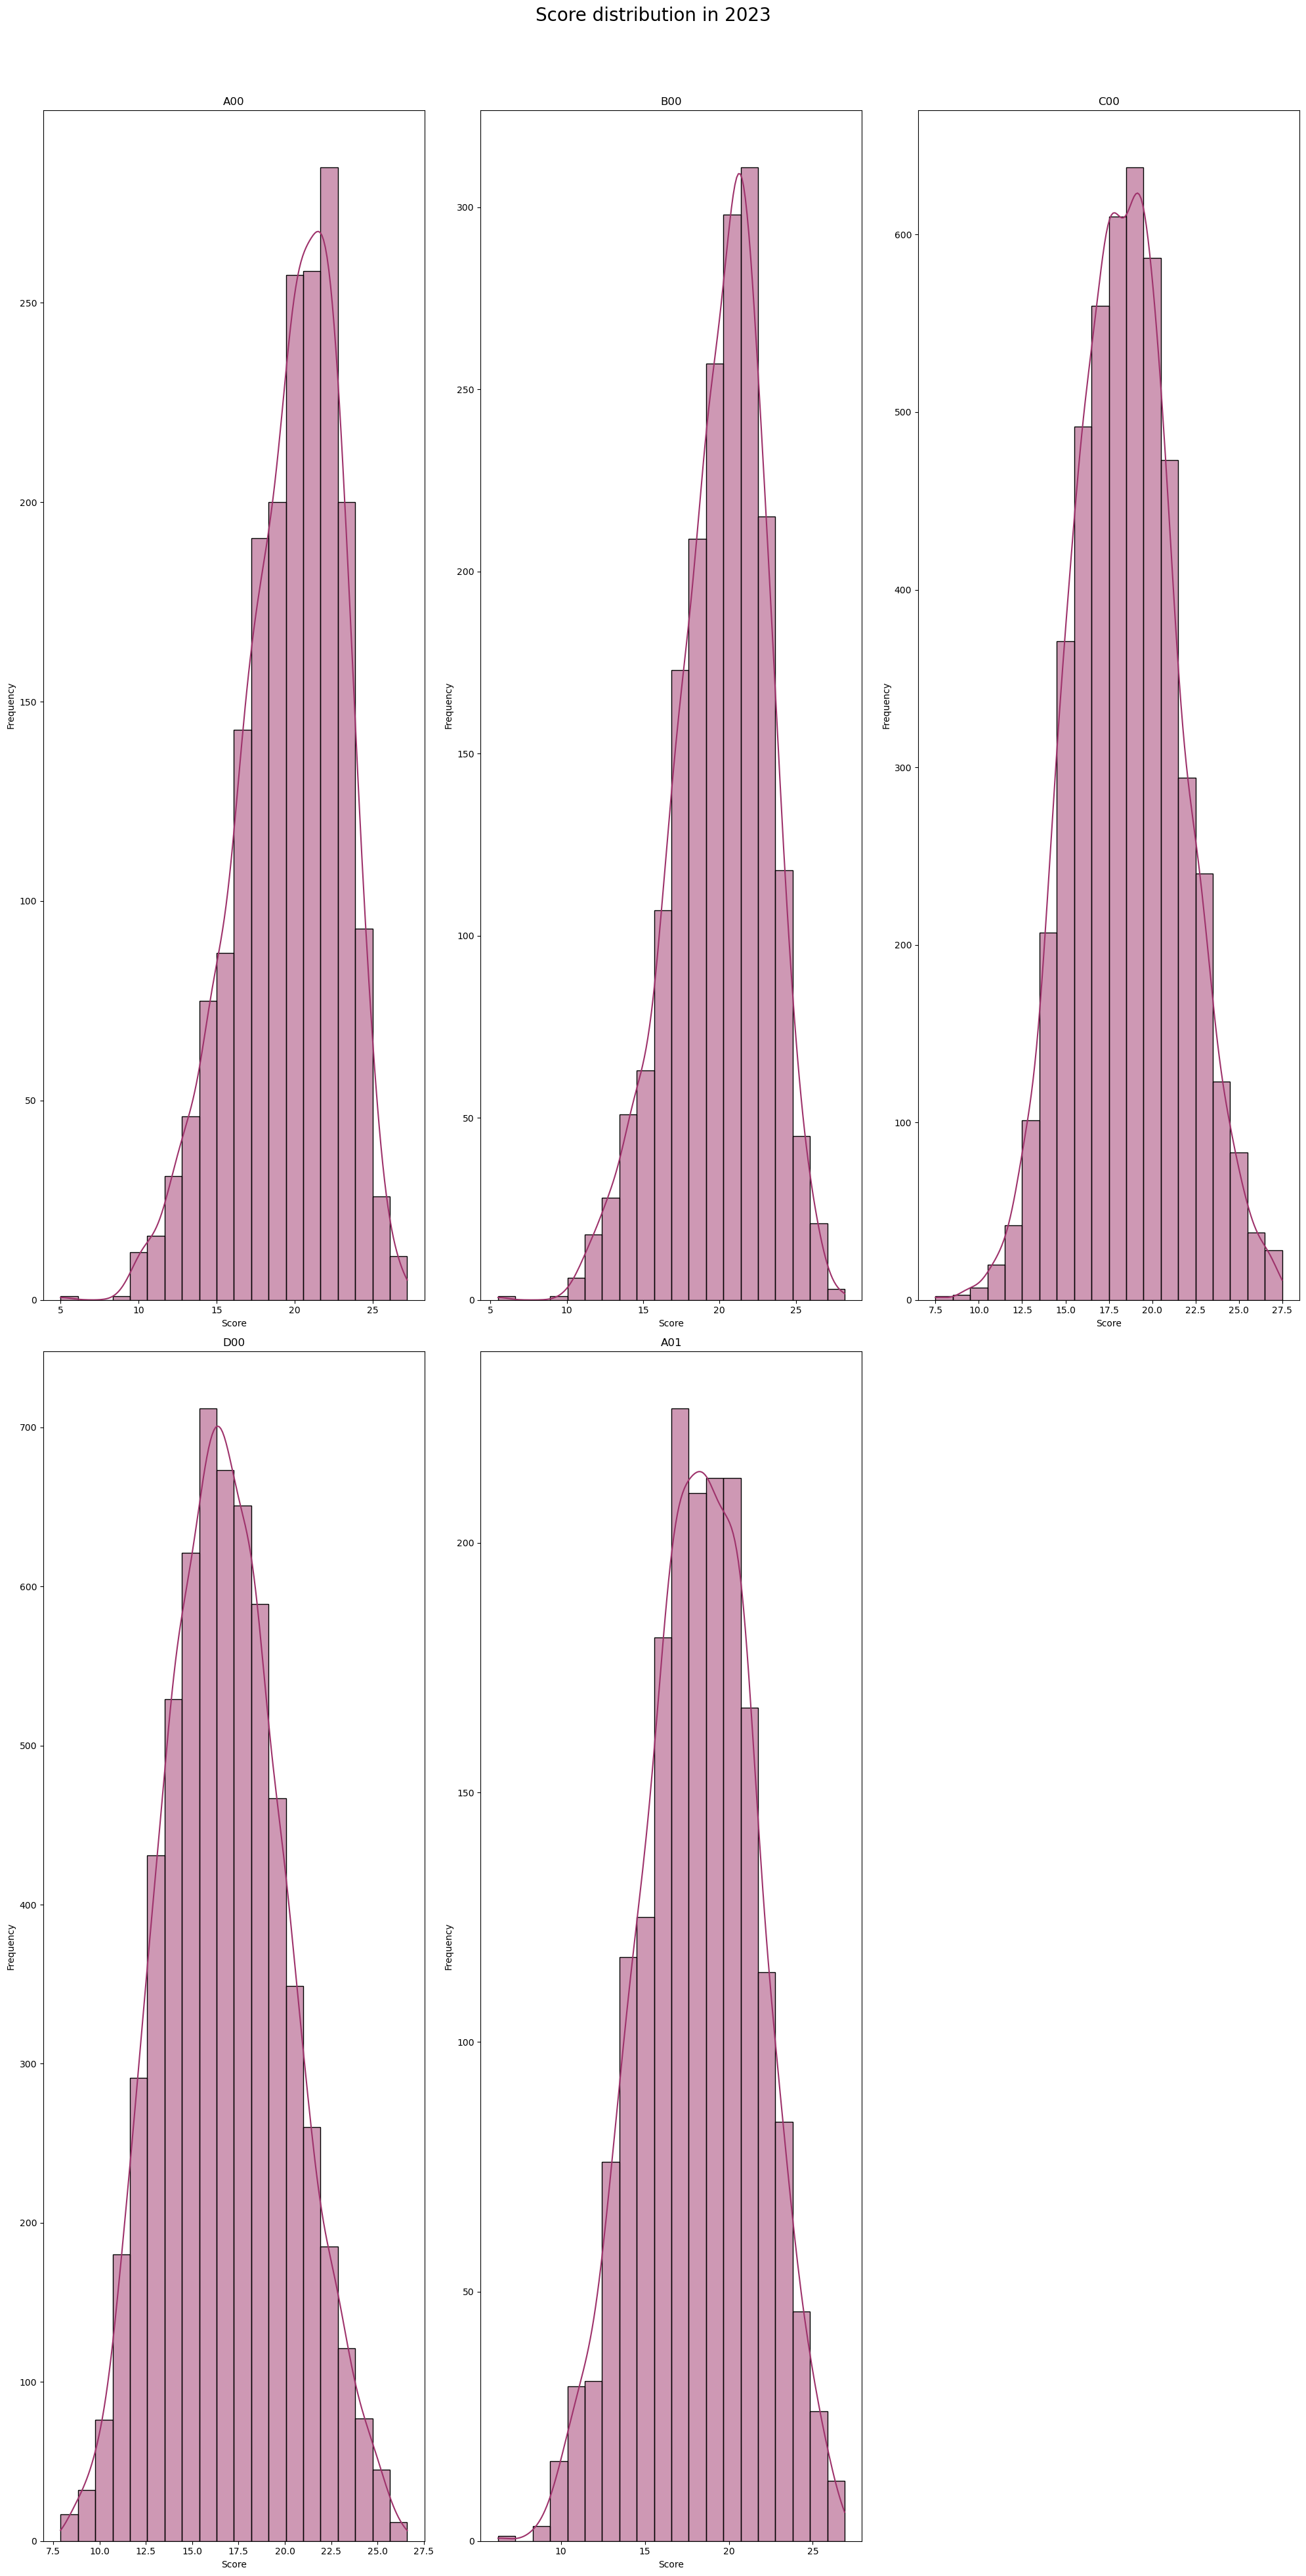

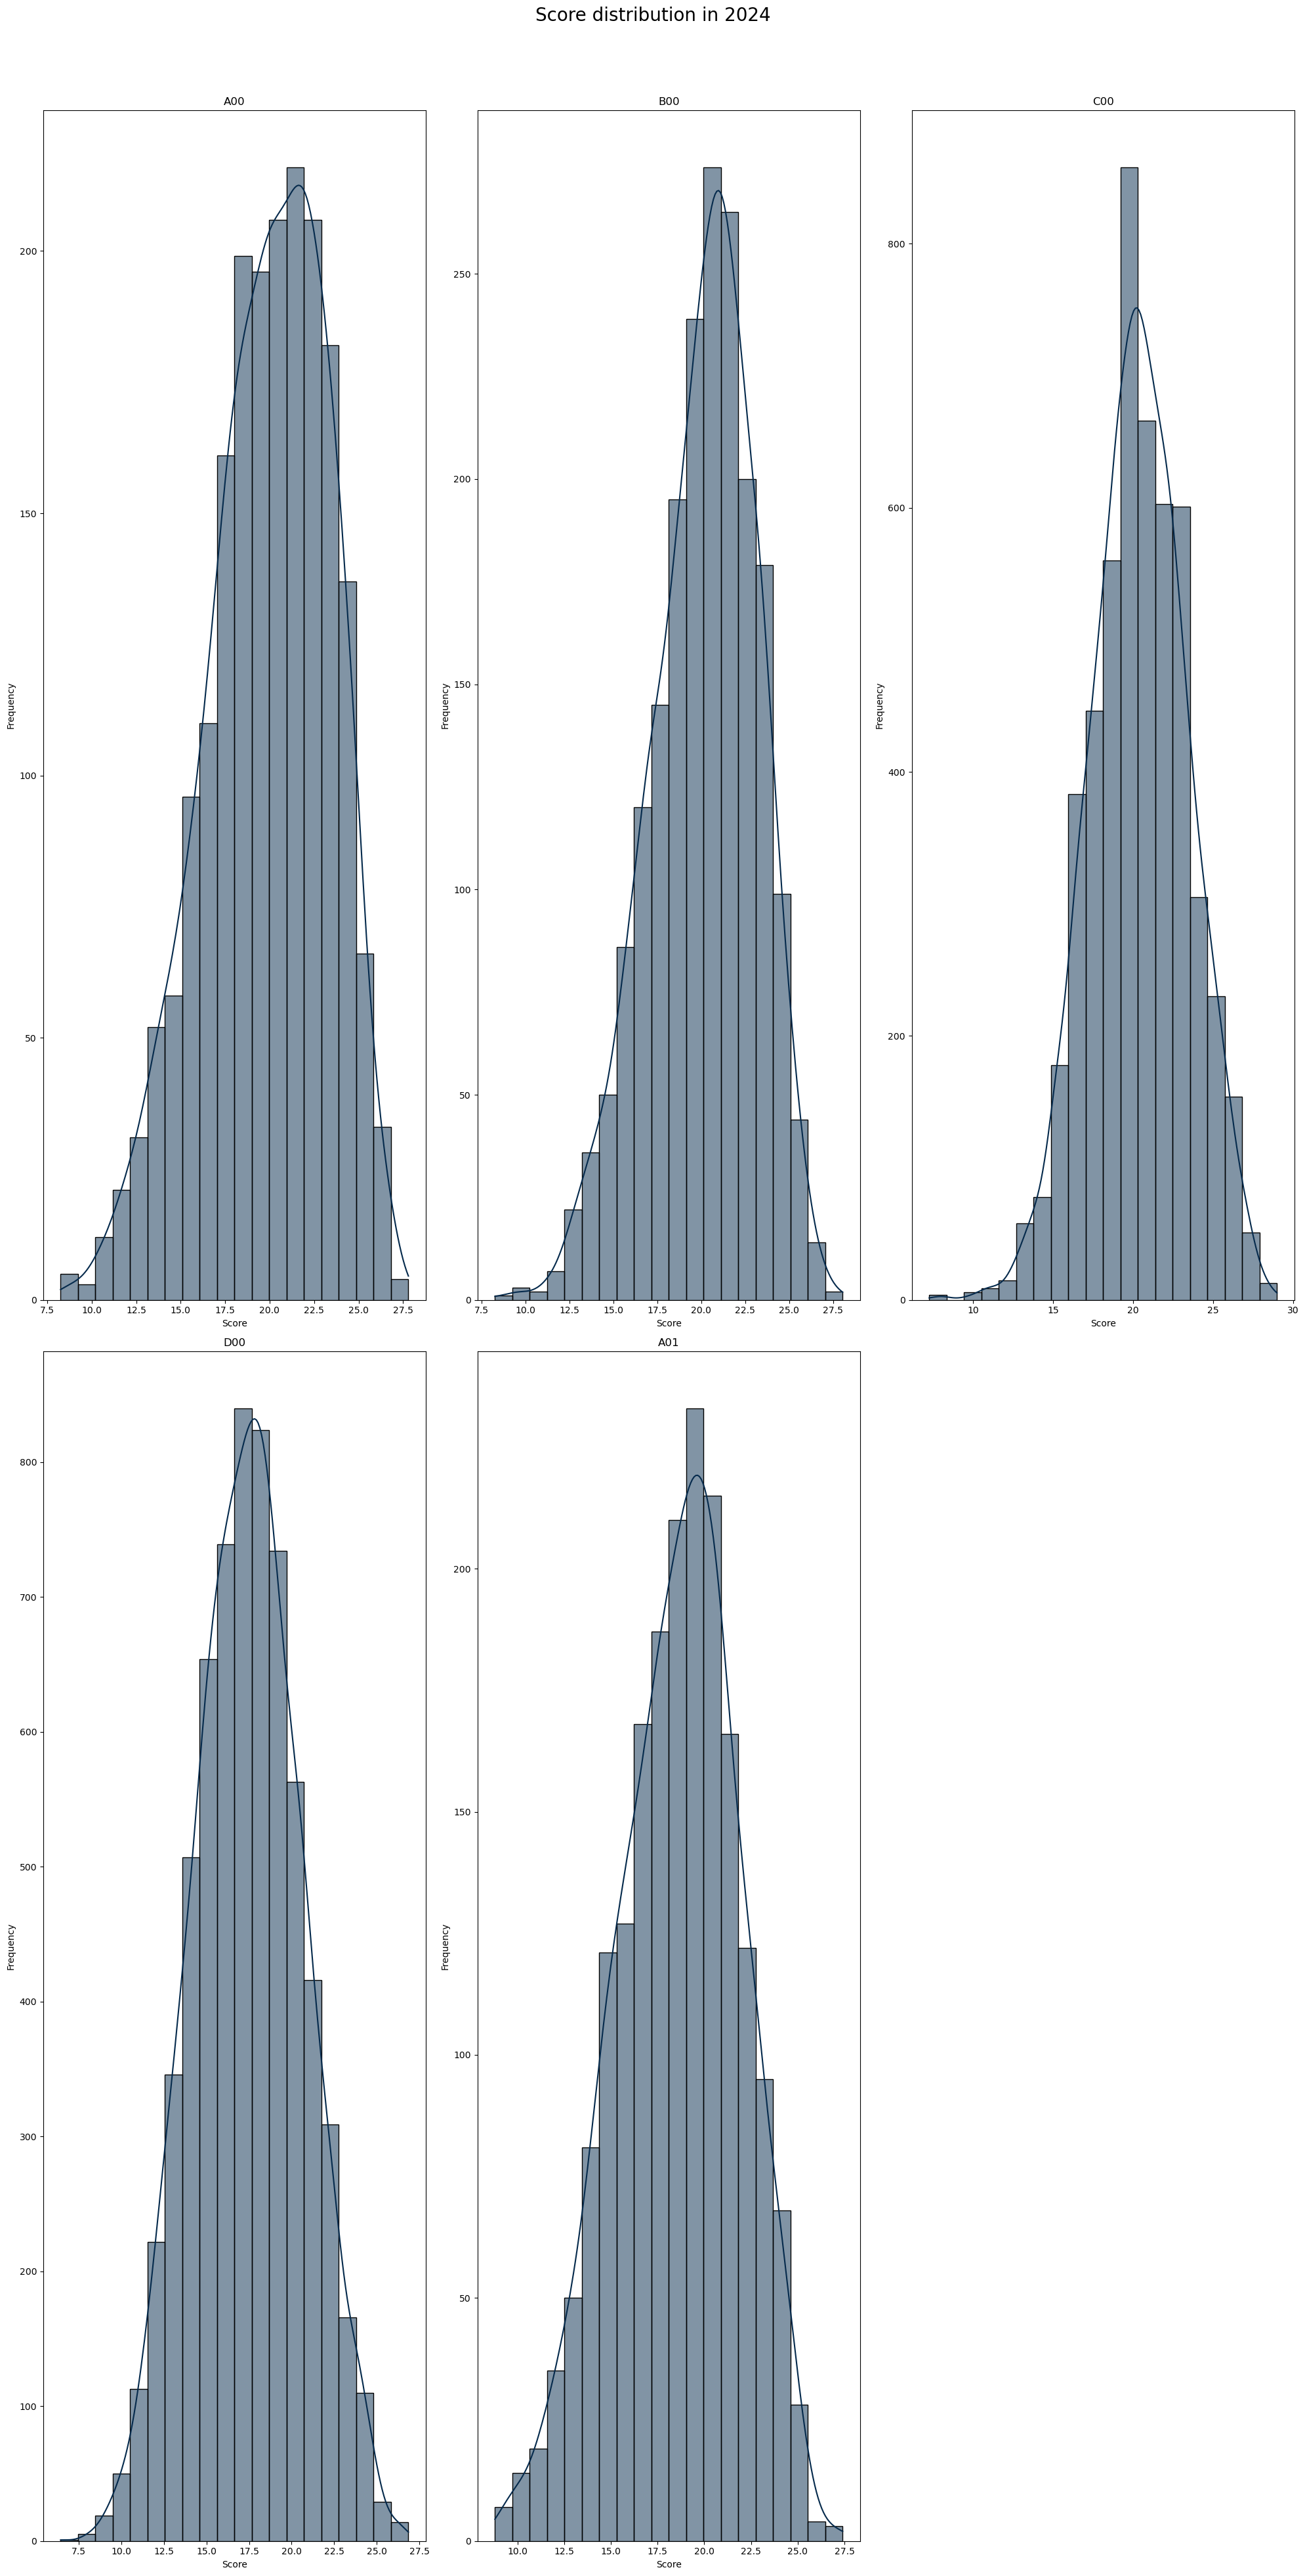

In [34]:
years = [2022, 2023, 2024]
block = ['A00', 'B00', 'C00', 'D00', 'A01']

for year in years:
    df_year = df[df['Year'] == year]
    fig, axes = plt.subplots(nrows = -(-len(block) // 3), ncols = 3 , figsize=(20, 40))
    fig.suptitle(f'Score distribution in {year}', fontsize=20)
    axes = axes.flatten()
    color = tuple(np.random.rand(3))
    for i, b in enumerate(block):
        sns.histplot(df_year[b].dropna(), kde=True, ax=axes[i], bins = 20, color = color)
        axes[i].set_title(f'{b}')
        axes[i].set_xlabel('Score')
        axes[i].set_ylabel('Frequency')
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

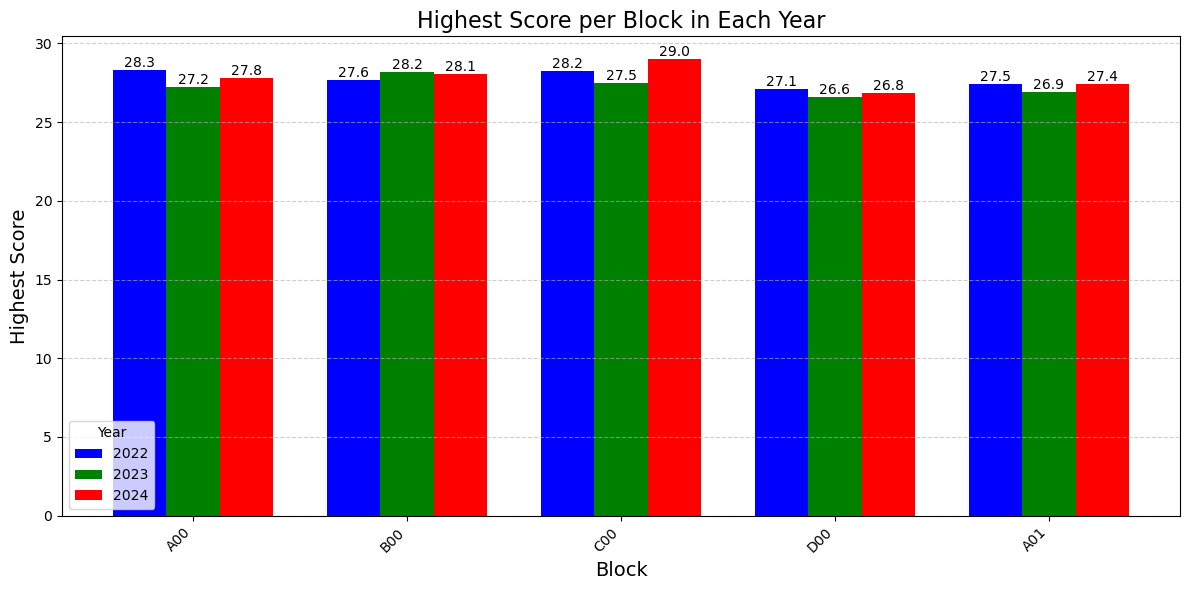

In [ ]:
years = [2022, 2023, 2024]
block = ['A00', 'B00', 'C00', 'D00', 'A01']

highest_scores = {year: [] for year in years}

for year in years:
    df_year = df[df['Year'] == year]
    for b in block:
        highest_scores[year].append(df_year[b].max()) 

x = np.arange(len(block))  
width = 0.25  

fig, ax = plt.subplots(figsize=(12, 6))

colors = ['b', 'g', 'r'] 
for i, year in enumerate(years):
    bars = ax.bar(x + i * width, highest_scores[year], width, label=str(year), color=colors[i])
    
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom', fontsize=10)

ax.set_title('Highest Score per Block in Each Year', fontsize=16)
ax.set_xlabel('Block', fontsize=14)
ax.set_ylabel('Highest Score', fontsize=14)
ax.set_xticks(x + width)  
ax.set_xticklabels(block, rotation=45, ha='right') 
ax.legend(title='Year')
ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()